In [13]:
import pickle

# Manipulação de dados
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos de machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Pipeline e avaliação
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
with open("../model/random_forest_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("../model/preprocessor.pkl", "rb") as f:
    preprocessor = pickle.load(f)

In [3]:

with open("../model/full_pipeline.pkl", "rb") as f:
    pipeline = pickle.load(f)

students = pd.read_parquet("../model/features_df.parquet")
X = students.drop(columns=["final_result", "dropout"])
y = students["dropout"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred = pipeline.predict(X_test)
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4546
           1       0.94      0.95      0.95      1973

    accuracy                           0.97      6519
   macro avg       0.96      0.96      0.96      6519
weighted avg       0.97      0.97      0.97      6519



In [8]:
print("Visão Geral dos Dados:")
display(students.head())
display(students.describe())
display(students["dropout"].value_counts())


Visão Geral dos Dados:


,code_module,code_presentation,gender,age_band,imd_band,highest_education,num_of_prev_attempts,studied_credits,final_result,days_enrolled,assessments,score,early_assessments,interactions,clicks,early_clicks,dropout
0,AAA,2013J,M,55<=,90-100%,HE Qualification,0,240,Pass,NaN,5.0,82.0,0.0,196.0,934.0,0.0,0
1,AAA,2013J,F,35-55,20-30%,HE Qualification,0,60,Pass,NaN,5.0,66.4,0.0,430.0,1435.0,0.0,0
2,AAA,2013J,F,35-55,30-40%,A Level or Equivalent,0,60,Withdrawn,104.0,NaN,NaN,NaN,76.0,281.0,0.0,1
3,AAA,2013J,F,35-55,50-60%,A Level or Equivalent,0,60,Pass,NaN,5.0,76.0,0.0,663.0,2158.0,0.0,0
4,AAA,2013J,F,0-35,50-60%,Lower Than A Level,0,60,Pass,NaN,5.0,54.4,0.0,352.0,1034.0,0.0,0


,num_of_prev_attempts,studied_credits,days_enrolled,assessments,score,early_assessments,interactions,clicks,early_clicks,dropout
count,32593.000000,32593.000000,11607.000000,26746.000000,26727.000000,26746.000000,29741.000000,29741.000000,29741.000000,32593.000000
mean,0.163225,79.758691,147.014129,10.461415,72.828037,0.017573,608.435728,2246.133419,19.574224,0.311601
std,0.479758,41.071900,93.710467,9.530639,15.564681,0.247458,847.860179,3516.187208,81.015024,0.463155
min,0.000000,30.000000,-350.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,60.000000,69.000000,5.000000,64.800000,0.000000,126.000000,353.000000,0.000000,0.000000
50%,0.000000,60.000000,137.000000,9.000000,75.714286,0.000000,328.000000,1043.000000,0.000000,0.000000
75%,0.000000,120.000000,211.000000,12.000000,84.055060,0.000000,752.000000,2737.000000,0.000000,1.000000
max,6.000000,655.000000,531.000000,92.000000,100.000000,8.000000,19167.000000,75477.000000,2210.000000,1.000000


dropout
0    22437
1    10156
Name: count, dtype: int64

In [4]:
with open("../model/preprocessor.pkl", "rb") as f:
    preprocessor = pickle.load(f)

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    pipeline.fit(X_train_raw, y_train)
    y_pred = pipeline.predict(X_test_raw)

    print(f"\n===== {name} =====")
    print(classification_report(y_test, y_pred))


===== Random Forest =====
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4546
           1       0.94      0.95      0.95      1973

    accuracy                           0.97      6519
   macro avg       0.96      0.96      0.96      6519
weighted avg       0.97      0.97      0.97      6519


===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      4546
           1       0.56      0.24      0.33      1973

    accuracy                           0.71      6519
   macro avg       0.65      0.58      0.58      6519
weighted avg       0.68      0.71      0.67      6519



c:\Users\thiag\Documents\aplicacaoMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:34:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



===== XGBoost =====
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4546
           1       0.94      0.95      0.95      1973

    accuracy                           0.97      6519
   macro avg       0.96      0.96      0.96      6519
weighted avg       0.97      0.97      0.97      6519

[LightGBM] [Info] Number of positive: 8183, number of negative: 17891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1452
[LightGBM] [Info] Number of data points in the train set: 26074, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313838 -> initscore=-0.782239
[LightGBM] [Info] Start training from score -0.782239

===== LightGBM =====
              precision    recall  f1-score   support

           0      

c:\Users\thiag\Documents\aplicacaoMachineLearning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


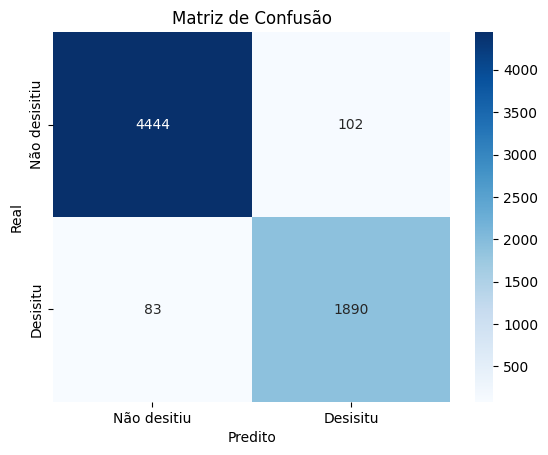

In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Não desitiu","Desisitu"],
            yticklabels=["Não desisitiu", "Desisitu"])

plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()


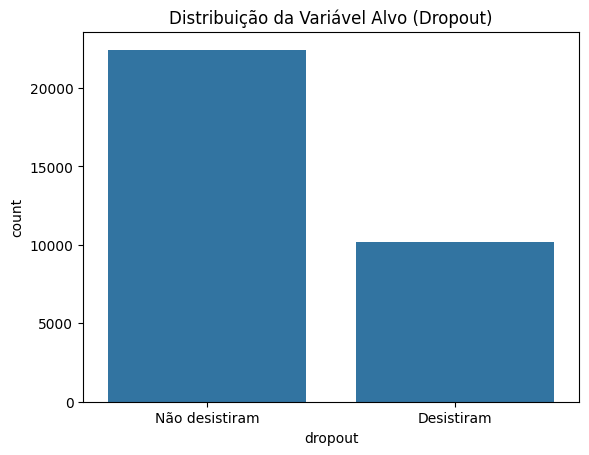

In [ ]:
sns.countplot(x='dropout', data=students)
plt.title("Distribuição da Variável Alvo (Dropout)")
plt.xticks(ticks=[0, 1], labels=["Não desistiram", "Desistiram"])
plt.show()

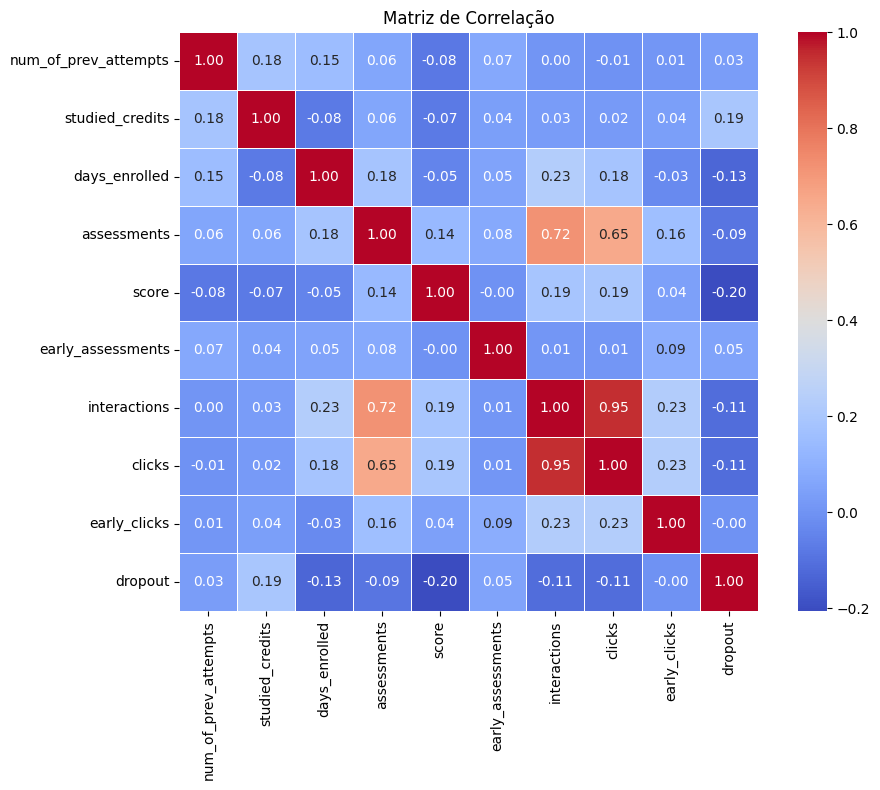

In [11]:
corr = students.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",  
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
)

plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()

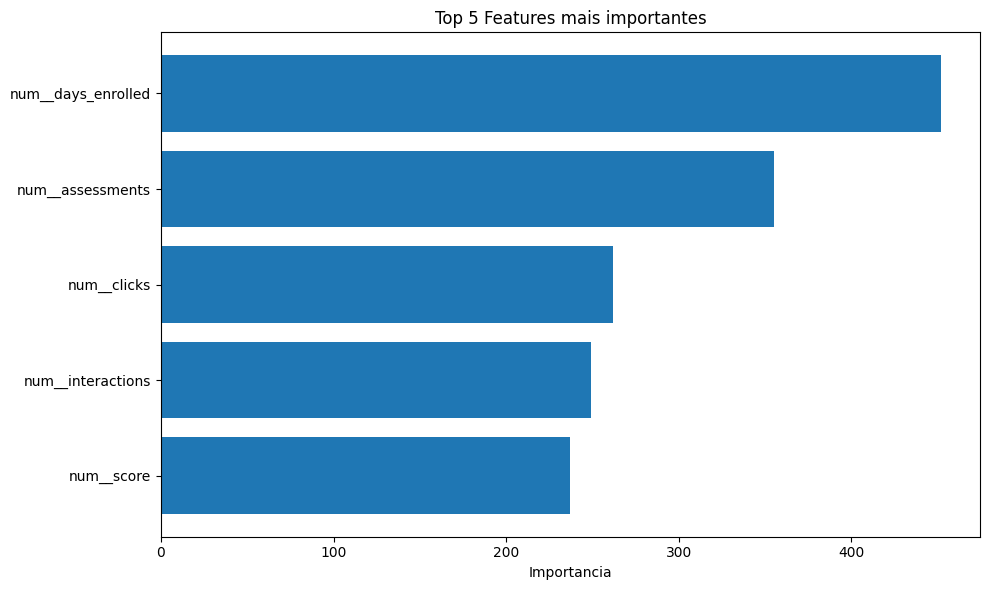

In [ ]:
features_names = pipeline.named_steps['preprocessor'].get_feature_names_out(X.columns)
importances = pipeline.named_steps["classifier"].feature_importances_

features_df = pd.DataFrame({
    "Feature":features_names,
    "Importance":importances
})

top_n = 5
top_features  = features_df.sort_values("Importance").tail(top_n)

plt.figure(figsize=(10,6))
plt.barh(top_features['Feature'], top_features["Importance"])
plt.xlabel("Importancia")
plt.title(f"Top {top_n} Features mais importantes para prever Desistência")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Avaliar com F1 Score
f1_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1', n_jobs=-1)

print(f"F1 médio: {f1_scores.mean():.4f}")
print(f"F1 scores individuais: {f1_scores}")

c:\Users\thiag\Documents\aplicacaoMachineLearning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


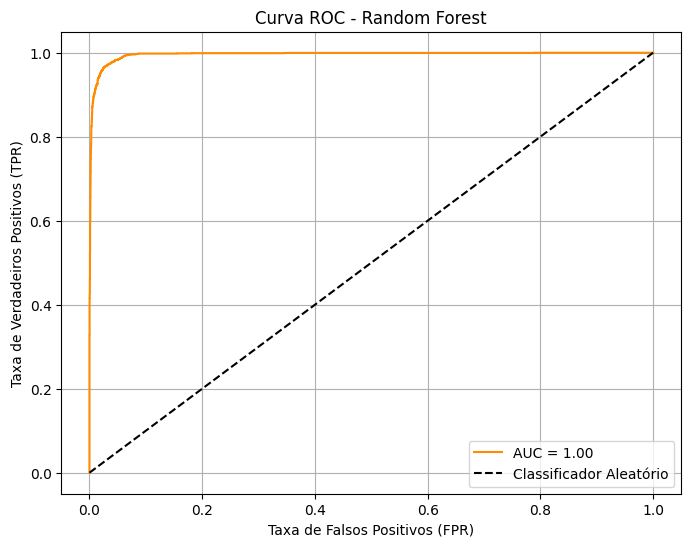

In [7]:
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color="darkorange")
plt.plot([0, 1], [0, 1], "k--", label="Classificador Aleatório")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Modelo menos complexo
rf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=42)

# Pipeline (mantém o mesmo pré-processamento)
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", rf)
])

# Validação cruzada com 5 folds e métrica AUC
scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')

print("AUC por fold:", scores)
print(f"AUC média (5-Fold CV): {scores.mean():.4f}")


AUC por fold: [0.98549006 0.98191133 0.96636115 0.98119322 0.9782705 ]
AUC média (5-Fold CV): 0.9786


In [6]:
rf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=42)


In [7]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", rf)
])

# Treinamento no dataset completo
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['num_of_prev_attempts',
                                                   'studied_credits',
                                                   'days_enrolled',
                                                   'assessments', 'score',
                                                   'early_assessments',
                                                   'interactions', 'clicks',
                                                   'early_clicks']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['code_module',
                                                   'code_presentation',
                                                   'gender', 'age_band',
                                                   'imd_band',
                                                   'highest_education'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=6, n_estimators=50,
                                        random_state=42))])

In [8]:
with open("../model/final_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

C:\Users\thiag\AppData\Local\Temp\ipykernel_4136\1689399620.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df.head(top_n), x="importance", y="feature", palette="viridis")


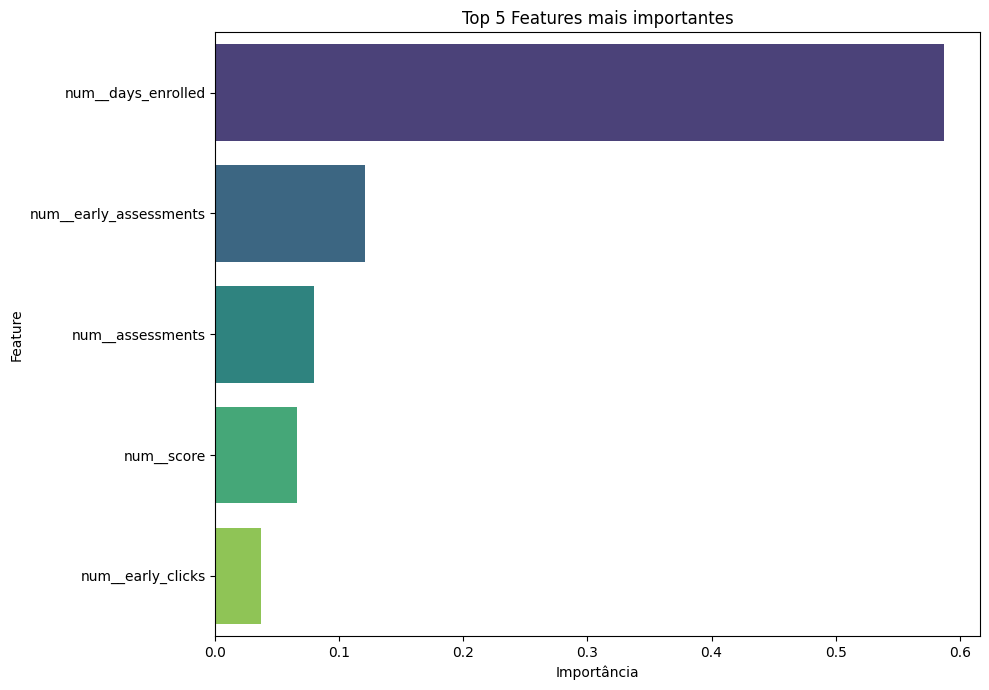

In [9]:
importances = pipeline.named_steps["classifier"].feature_importances_

feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()

feat_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

top_n = 5
plt.figure(figsize=(10, 7))
sns.barplot(data=feat_df.head(top_n), x="importance", y="feature", palette="viridis")
plt.title(f"Top {top_n} Features mais importantes")
plt.xlabel("Importância")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [14]:
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva (assumindo que a classe positiva é a 1)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)  

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha diagonal
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

NameError: name 'auc' is not defined